## Zeros of Bessel functions
Let $j_{\nu,m}$ denote the $m$th zero of the Bessel function $J_\nu(z)$.
Asymptotically it holds

$$\mathop{j_{\nu,m}}\nolimits\nolimits\sim a-\frac{\mu-1}{8a}
-\frac{4(\mu-1)(7\mu-31)}{3(8a)^{3}}-\frac{32(\mu-1)(83\mu^{2}-982\mu+3779
)}{15(8a)^{5}}-\frac{64(\mu-1)(6949\mu^{3}-1\;53855\mu^{2}+1585743\mu-6277
237)}{105(8a)^{7}}-\cdots$$

for $m\to\infty$ where $a=(m+\frac{1}{2}\nu-\frac{1}{4})\pi$ and $\mu=4\nu^2$, cf.
http://dlmf.nist.gov/10.21#vi. 

The following function computes this approximation for $j_{\nu,m}$:

In [1]:
function besselj_zero_approx1(ν::Integer, m::Integer)
    μ = 4.0*ν^2
    a = (m+ν/2-1/4)*π
    a8 = 1/(8a)
    a82 = a8^2
    j = (a -(μ-1)*a8*(1 + a82*(4*(7μ-31)/3 +a82*( 32*(83*μ^2-982*μ+3779)/15 +
         a82*(64*(6949*μ^3-153855*μ^2+1585743*μ-6277237)/105))))
        )
end

besselj_zero_approx1 (generic function with 1 method)

Similarly, let $j_{\nu,m}'$ denote the $m$th zero of the derivative $J_\nu'(z)$.
Asymptotically it holds

$$\mathop{j_{\nu,m}}\nolimits'\sim b-\frac{\mu+%
3}{8b}-\frac{4(7\mu^{2}+82\mu-9)}{3(8b)^{3}}-\frac{32(83\mu^{3}+2075\mu^{2}-30%
39\mu+3537)}{15(8b)^{5}}-\frac{64(6949\mu^{4}+2\;96492\mu^{3}-12\;48002\mu^{2}%
+74\;14380\mu-58\;53627)}{105(8b)^{7}}-\cdots,$$

for $m\to\infty$ where $b=(m+\frac{1}{2}\nu-\frac{3}{4})\pi$ and $\mu=4\nu^2$, cf.
http://dlmf.nist.gov/10.21#vi.  

The following function computes this approximation for $j_{\nu,m}'$:

In [2]:
function besseljprime_zero_approx1(ν::Integer, m::Integer)
    #if (ν==0 && m==1)
    #    return 0.0
    #end
    if ν==0
        m += 1
    end
    μ = 4*ν^2
    b = (m+ν/2-3/4)*π
    b8 = 1/(8*b)
    b82 = b8^2
    j = (b - b8*(μ+3 + b82*(4*(7*μ^2+82*μ-9)/3 +b82*(32*(83*μ^3+2075*μ^2-3039*μ+3537)/15 + 
             b82*(64*(6949*μ^4+296492*μ^3-1248002*μ^2+7414380*μ-5853627)/105)))))
end

besseljprime_zero_approx1 (generic function with 1 method)

The above approximations for $j_{\nu,m}$ and $j_{\nu,m}'$ are only useful for
small $\nu$. For larger $\nu$ we obtain approximations with a method described in

N.M Temme, An algorithm with ALGOL 60 program for the computation of the zeros of ordinary bessel functions and those of their derivatives, J.Comp.Phys. 32, 270-279 (1979)

To calculate an approximation of $j_{\nu,m}$ with this method we need an approximation for the $m$th negative zero $a_m$ of the Airy function $\mathrm{Ai}(z)$, cf.
http://dlmf.nist.gov/9.9#E6:
$$\mathop{a_{k}}\nolimits=-T\left(\tfrac{3}{8}\pi(4k-1)\right)$$
$$T(t)\sim t^{2/3}\left(1+\frac{5}{48}t^{-2}-\frac{5}{36}t^{-4}+\frac{77125}{829%
44}t^{-6}-\frac{1080\;56875}{69\;67296}t^{-8}+\frac{16\;23755\;96875}{3344\;30%
208}t^{-10}-\cdots\right),$$

The following function computes this approximation for $a_m$:

In [3]:
function airy_zero_approx(m::Integer)
    if m<=10
        z =[-2.338107410459767,
            -4.087949444130970,
            -5.520559828095552,
            -6.786708090071759,
            -7.944133587120853,
            -9.022650853340980,
           -10.04017434155809,
           -11.00852430373326,
           -11.93601556323626,
           -12.82877675286576][m]
    else    
        t = 3/8*π*(4*m-1)
        t2 = t^(-2)
        z = -t^(2/3)*(1+t2*(5/48+t2*(-5/36+t2*(77125/82944+t2*(
            -108056875/6967296+ t2*162375596875/334430208)))))
    end   
    z
end

airy_zero_approx (generic function with 1 method)

Similarly, to calculate an approximation of $j_{\nu,m}'$  we need an approximation for the $m$th negative zero $a_m'$ of the derivative $\mathrm{Ai}'(z)$, cf.
http://dlmf.nist.gov/9.9#E8:
$$\mathop{a'_{k}}\nolimits=-U\left(\tfrac{3}{8}\pi(4k-3)\right),$$
$$U(t)\sim t^{2/3}\left(1-\frac{7}{48}t^{-2}+\frac{35}{288}t^{-4}-\frac{1\;81223%
}{2\;07360}t^{-6}+\frac{186\;83371}{12\;44160}t^{-8}-\frac{9\;11458\;84361}{19%
11\;02976}t^{-10}+\cdots\right),$$

The following function computes this approximation for $a_m'$:

In [4]:
function airyprime_zero_approx(m::Integer)
    if m<=10
        z = [-1.0187929716474710890,
             -3.2481975821798365379,
             -4.8200992111787356394,
             -6.1633073556394865476,
             -7.3721772550477701771,
             -8.4884867340197221329,
             -9.5354490524335474707,
            -10.527660396957407282,
            -11.475056633480245295,
            -12.384788371845747325][m]
    else    
        t = 3/8*π*(4*m-3)
        t2 = t^(-2)
        z = -t^(2/3)*(1+t2*(-7/48+t2*(35/288+t2*(-181223/207360+t2*(
            18683371/1244160 - t2*9114588436/191102976)))))
    end   
    z
end

airyprime_zero_approx (generic function with 1 method)

The following function implements the method form the above reference for the calculation of an approximation of $j_{\nu,m}$ or $j_{\nu,m}'$ valid for small $\nu$:

In [5]:
function besselj_zero_approx2(ν::Integer, m::Integer; prime::Bool=false)
    if prime 
        ζ = ν^(-2/3)*airyprime_zero_approx(m)
    else
         ζ = ν^(-2/3)*airy_zero_approx(m)
    end
    y = 2/3*(-ζ)^(3/2)
    if y>100000
        x = π/2
    elseif y<1
        p = (3*y)^(1/3)
        p2 = p^2
        x = p*(1+p2*(-2/15+p2*(3/175+p2*(-2/1575))))
    else
        p = 1/(y+π/2)
        p2 = p^2
        x = π/2 - p*(1+p2*(2/3+p2*(13/15+p2*(146/105+p2*(781/315+p2*16328/3465)))))        
    end
    x2 = (y+x)^2
    r = (x-atan(x+y))/x2
    x = x - (1+x2)*r*(1+r/(x+y))

    z = 1/cos(x)
    h = sqrt(ζ*(1-z^2))
    if prime
        g1 = z/ζ*h*(7/(48*ζ) + h*(7/(z^2-1)+9
        )/24)
        j = ν*z + g1/ν
    else
        f1 = -z/ζ*h*(5/(48*ζ) + h*(5/(z^2-1)+3)/24)
        j = ν*z + f1/ν
    end
    j
end

besselj_zero_approx2 (generic function with 1 method)

The following function calculates an approximations for $j_{\nu,m}$  valid for all $\nu$ and $m$: 

In [6]:
function besselj_zero_approx(ν::Integer, m::Integer)
  if m>=ν
     j = besselj_zero_approx1(ν, m)
  else
     j = besselj_zero_approx2(ν, m)
  end      
  j
end

besselj_zero_approx (generic function with 1 method)

Similarly, the following function calculates an approximations for $j_{\nu,m}'$  valid for all $\nu$ and $m$: 

In [7]:
function besseljprime_zero_approx(ν::Integer, m::Integer)
  if m>=ν
        j = besseljprime_zero_approx1(ν, m)
  else
        j = besselj_zero_approx2(ν, m, prime=true)
  end      
  j
end

besseljprime_zero_approx (generic function with 1 method)

Starting from an approximation for a zero of $J_\nu(z)$ the following function
improves this approximation iteratively using Newton's method.
For the derivative of $J_\nu(z)$ needed by Newton's method we use 
$$\mathop{J_{\nu}'}\!\left(z\right)=\mathop{J_{
\nu-1}}\nolimits\!\left(z\right)-\frac{\nu}{z}\mathop{J_{\nu}}
\nolimits\!\left(z\right).$$

In [8]:
function besselj_zero_iter(ν::Integer, z::AbstractFloat)
    T = typeof(z)
    ɛ = eps(T)
    for i = 1:200
        J = besselj(ν, z)
        if abs(J) < 1000ɛ 
            break
        end        
        Jprime = besselj(ν-1, z) - ν*J/z
        z -= J/Jprime   
        if i==200
            println("200 iterations, res=",abs(J))
        end
    end
    return z
end

besselj_zero_iter (generic function with 1 method)

Similarly, starting from an approximation for a zero of $J_\nu'(z)$ the following function
improves this approximation iteratively using Newton's method.
For the second derivative $J_\nu''(z)$ needed by Newton's method we use 
$$J_{\nu}''(z)=-\frac{1}{z}J_{\nu}'(z)+\left(\frac{\nu^2}{z^2}-1\right)J_{\nu}(z),$$
where $J_{\nu}'(z)$ is given by
$$\mathop{J_{\nu}'}\!\left(z\right)=\mathop{J_{
\nu-1}}\nolimits\!\left(z\right)-\frac{\nu}{z}\mathop{J_{\nu}}
\nolimits\!\left(z\right).$$

In [9]:
function besseljprime_zero_iter(ν::Integer, z::AbstractFloat)    
    T = typeof(z)
    ɛ = eps(T)
    for i = 1:200
        J = besselj(ν, z)
        J1 = besselj(ν-1, z) - ν*J/z
        if abs(J1) < 1000ɛ 
            break
        end       
        J2 = -J1/z + ((ν/z)^2-1)*J
        z -= J1/J2   
        if i==200
            println("200 iterations, res=",abs(J1))
        end
    end
    return z
end

besseljprime_zero_iter (generic function with 1 method)

In [10]:
besselj_zero(ν, m, T=Float64) = besselj_zero_iter(ν, convert(T, besselj_zero_approx(ν, m)))

besselj_zero (generic function with 2 methods)

In [11]:
besseljprime_zero(ν::Integer, m::Integer, T=Float64) =
    besseljprime_zero_iter(ν, convert(T, besseljprime_zero_approx(ν, m)))

besseljprime_zero (generic function with 2 methods)

In [12]:
using PyPlot

In [13]:
using SpecialFunctions

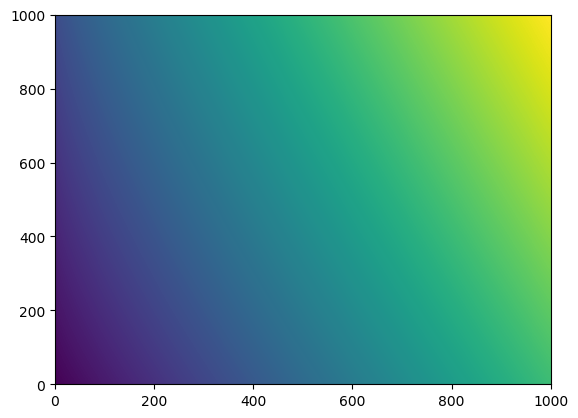

PyObject <matplotlib.collections.PolyCollection object at 0x7fcc9c67fa50>

In [14]:
z = Float64[besselj_zero(ν, k, Float64) for ν=1:1000, k=1:1000]
pcolor(z)

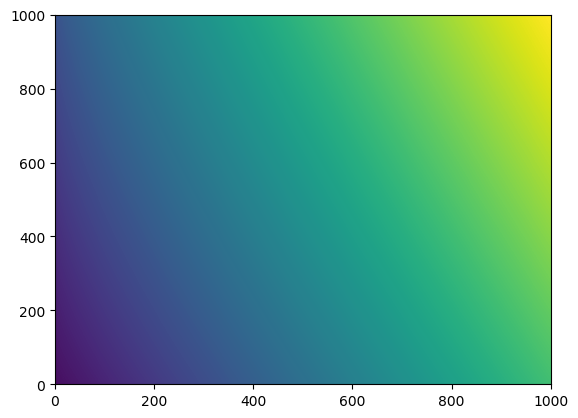

PyObject <matplotlib.collections.PolyCollection object at 0x7fcc97ddbd90>

In [15]:
z = Float64[besseljprime_zero(ν, k, Float64) for ν=1:1000, k=1:1000]
pcolor(z)

## Computations using Bigfloat and Quadmath/Float128
We calculate the first 100 zeros of the first 101 Bessel functions.

In [16]:
mmax = 100;
νmax = 100;

First we use __BigFloat__ with precision 113 bits, exactly the precison of Float128:

In [17]:
setprecision(113)

dummy = besselj_zero(0, 1, BigFloat) 
j_bf_time = @elapsed j_bf = BigFloat[besselj_zero(ν, m, BigFloat) for ν=0:νmax, m=1:mmax]
j_bf

101×100 Array{BigFloat,2}:
 2.40482555769577276862163187932645475      …  3.13374266077527844719690245101902241e+02
 3.83170597020751231561443588630816071         3.14943472837767162458065600245612127e+02
 5.13562230184068255630140169013776579         3.16509535868128429585533287236806371e+02
 6.38016189592398350623661464194270357         3.18072501419144132055026568868862209e+02
 7.58834243450380438506963000798561741         3.19632414630425705634404677271588722e+02
 8.77148381595995401912286713340956027      …  3.21189319567600315733922205996408600e+02
 9.93610952421768489469308912696519267         3.22743259257683369021774485609678388e+02
 1.10863700192450838457627644359299991e+01     3.24294275722967013886561795050315039e+02
 1.22250922640046551756128047691073987e+01     3.25842410013500062317371915749048547e+02
 1.33543004774353310664199248834919227e+01     3.27387702238230273055544191699100512e+02
 1.44755006865545412384516376554131522e+01  …  3.2893019159487574928997503529758247

Next the same using __Float128__:

In [18]:
using Quadmath
dummy = besselj_zero(0, 1, Float128) 
j_f128_time = @elapsed j_f128 = Float128[besselj_zero(ν, m, Float128) for ν=0:νmax, m=1:mmax]
j_f128

101×100 Array{Quadmath.Float128,2}:
 2.40482555769577276862163187932645475e+00  …  3.13374266077527844719690245101902241e+02
 3.83170597020751231561443588630816071e+00     3.14943472837767162458065600245612127e+02
 5.13562230184068255630140169013776502e+00     3.16509535868128429585533287236806371e+02
 6.38016189592398350623661464194270357e+00     3.18072501419144132055026568868862209e+02
 7.58834243450380438506963000798561741e+00     3.19632414630425705634404677271588722e+02
 8.77148381595995401912286713340956027e+00  …  3.21189319567600315733922205996408600e+02
 9.93610952421768489469308912696519113e+00     3.22743259257683369021774485609678388e+02
 1.10863700192450838457627644359299991e+01     3.24294275722967013886561795050315039e+02
 1.22250922640046551756128047691073987e+01     3.25842410013500062317371915749048547e+02
 1.33543004774353310664199248834919227e+01     3.27387702238230273055544191699100512e+02
 1.44755006865545412384516376554131522e+01  …  3.2893019159487574928997503

Compare the accuracy:

In [19]:
maximum(abs.((j_f128-j_bf)./j_bf)), eps(BigFloat), eps(Float128)

(1.90528124820805902485121404460862516e-34, 1.92592994438723585305597794258492732e-34, 1.92592994438723585305597794258492732e-34)

Float128 is about 5 times faster than BigFloat:

In [20]:
j_bf_time/j_f128_time

5.976277647587135

Finally the same using __Float64__:

In [21]:
dummy = besselj_zero(0, 1, Float64)
j_f64_time = @elapsed j_f64 = Float64[besselj_zero(ν, m, Float64) for ν=0:νmax, m=1:mmax]
j_f64

101×100 Array{Float64,2}:
   2.40483    5.52008    8.65373  …  303.95   307.091  310.233  313.374
   3.83171    7.01559   10.1735      305.519  308.66   311.802  314.943
   5.13562    8.41724   11.6198      307.085  310.226  313.368  316.51 
   6.38016    6.38016   13.0152      308.647  311.789  314.931  318.073
   7.58834   11.0647    14.3725      310.207  313.349  316.491  319.632
   8.77148   12.3386    15.7002   …  311.763  314.905  318.047  321.189
   9.93611   13.5893    17.0038      313.317  316.459  319.601  322.743
  11.0864    14.8213    18.2876      314.867  318.01   321.152  324.294
  12.2251    16.0378    19.5545      316.415  319.557  322.7    325.842
  13.3543    17.2412    20.807       317.959  321.102  324.245  327.388
  14.4755    18.4335    22.047    …  319.501  322.644  325.787  328.93 
  15.5898    19.616     23.2759      321.04   324.183  327.327  330.47 
  16.6982    20.7899    24.4949      322.576  325.72   328.863  332.007
   ⋮                              ⋱   

In [22]:
maximum(abs.((j_f128-j_f64)./j_f128)), eps(Float64)

(4.69854208305616341309921343163900531e-14, 2.220446049250313e-16)

Float64 is about 25 times faster than Float128:

In [23]:
j_f128_time/j_f64_time

34.16592964690387

Now we do the same as above with the zeros of the derivatives of the Bessel functions.

In [24]:
dummy = besseljprime_zero(0, 1, BigFloat) 
j1_bf_time = @elapsed j1_bf = BigFloat[besseljprime_zero(ν, m, BigFloat) for ν=0:νmax, m=1:mmax]
j1_bf

101×100 Array{BigFloat,2}:
 3.83170597020751231561443588630816071      …  3.14943472837767162458065600245612127e+02
 1.84118378134065930264362951364444326         3.13371074967125319790324515567509425e+02
 3.05423692822714032275593209114856057         3.14937122257076610622142117224898316e+02
 4.20118894121052849618785529745671241         3.16500056771020943428461465074002078e+02
 5.31755312608399435036335555818892439         3.18059924095160387162513603909007742e+02
 6.4156163757002402828398147190879245       …  3.19616768725777590734181280486962855e+02
 7.50126614468414702693553244460797652         3.21170634105307603635428094761502654e+02
 8.57783648971407412525693961763954329         3.22721562656889044119444005521026159e+02
 9.64742165199721683294325462502214909         3.24269595817472280306365167656926364e+02
 1.0711433970699945464986469770268534e+01      3.25814774069557641883732948947072118e+02
 1.17708766749555819319629047509542123e+01  …  3.2735713697163235055630264730800582

In [25]:
dummy = besseljprime_zero(0, 1, Float128) 
j1_f128_time = @elapsed j1_f128 = Float128[besseljprime_zero(ν, m, Float128) for ν=0:νmax, m=1:mmax]
j1_f128

101×100 Array{Quadmath.Float128,2}:
 3.83170597020751231561443588630816071e+00  …  3.14943472837767162458065600245612127e+02
 1.84118378134065930264362951364444326e+00     3.13371074967125319790324515567509425e+02
 3.05423692822714032275593209114856096e+00     3.14937122257076610622142117224898316e+02
 4.20118894121052849618785529745671241e+00     3.16500056771020943428461465074002078e+02
 5.31755312608399435036335555818892439e+00     3.18059924095160387162513603909007742e+02
 6.41561637570024028283981471908792373e+00  …  3.19616768725777590734181280486962855e+02
 7.50126614468414702693553244460797652e+00     3.21170634105307603635428094761502654e+02
 8.57783648971407412525693961763954329e+00     3.22721562656889044119444005521026159e+02
 9.64742165199721683294325462502214909e+00     3.24269595817472280306365167656926364e+02
 1.07114339706999454649864697702685340e+01     3.25814774069557641883732948947072118e+02
 1.17708766749555819319629047509542123e+01  …  3.2735713697163235055630264

In [26]:
maximum(abs.((j1_f128-j1_bf)./j1_f128))

1.07907408669138811982005246303056076e-27

In [27]:
j1_bf_time/j1_f128_time

4.922174961153119

In [28]:
dummy = besselj_zero(0, 1, Float64)
j1_f64_time = @elapsed j1_f64 = Float64[besseljprime_zero(ν, m, Float64) for ν=0:νmax, m=1:mmax]
j1_f64

101×100 Array{Float64,2}:
   3.83171    7.01559      10.1735   …  305.519  308.66   311.802  314.943
   1.84118    5.33144       8.53632     303.946  307.088  310.229  313.371
   3.05424    6.70613       9.96947     305.512  308.654  311.795  314.937
   4.20119    1.75719e-6   11.3459      307.075  310.217  313.358  316.5  
   5.31755    9.2824        9.2824      308.634  311.776  314.918  318.06 
   6.41562   10.5199       17.3128   …  310.191  313.333  316.475  319.617
   7.50127   11.7349       15.2682      311.744  314.886  318.028  321.171
   8.57784   12.9324       16.5294      313.294  316.437  319.579  322.722
   9.64742   14.1155       17.774       314.842  317.984  321.127  324.27 
  10.7114    15.2867       19.0046      316.386  319.529  322.672  325.815
  11.7709    16.4479       20.223    …  317.928  321.071  324.214  327.357
  12.8265    17.6003       21.4309      319.466  322.61   325.753  328.897
  13.8788    18.7451       22.6293      321.002  324.146  327.29   330.434

In [29]:
maximum(abs.((j1_f128-j1_f64)./j1_f128))

1.07374182300046457774511114911924290e+09

In [30]:
j1_f128_time/j1_f64_time

33.06000262269713